In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import evophys.population.population as pop
import evophys.models.binding.ssb as ssb
import evophys.mutation.mutation as mut

%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### SSBdynam can define models with different numbers of sites

In [2]:
# One site binding model
ssb1 = ssb.SSBdynam({"nk":1,"k1":1e7})

# Two site
ssb2 = ssb.SSBdynam({"nk":2,"k1":1e7,"k2":1e7,"f12":1})

print "One site binding function: \t%s" % ssb1.function_string
print "Two site binding function: \t%s" % ssb2.function_string

One site binding function: 	(k1*x) / (1*(1+k1*x))
Two site binding function: 	(k1*x+k2*x+2*f12*k1*k2*x**2) / (2*(1+k1*x+k2*x+f12*k1*k2*x**2))


#### The two-site binding model with cooperativity "f" set to 1 and two identical binding sites gives the same curve as a one site model

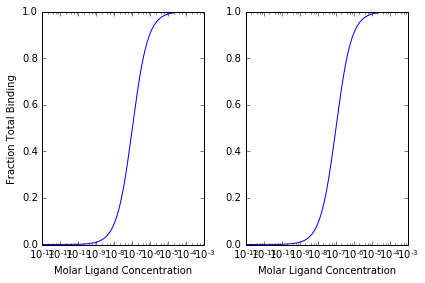

In [3]:
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.plot(ssb1.xvals,ssb1.output)
ax2.plot(ssb2.xvals,ssb2.output)

ax1.set_xscale("log")
ax2.set_xscale("log")

ax1.set_xlabel("Molar Ligand Concentration")
ax2.set_xlabel("Molar Ligand Concentration")
ax1.set_ylabel("Fraction Total Binding")

plt.tight_layout()

## Mutation model

In [19]:
# Define mutation functions
# Keep nk the same for now
mutFuncs = {"k": lambda x: x + random.normalvariate(0,100),
            "f": lambda x: x + random.normalvariate(0,1),
            "nk": lambda x: x}

# Probability of nk and any f mutating. The probability of any k mutating is 1-nk-f
nk_mut_prob = .1
f_mut_prob = .2

mutator = mut.SSBmut(mutations=mutFuncs,nk_prob=nk_mut_prob,anyF_prob=f_mut_prob)

#### 100 rounds of selection on a one-site binding model

In [5]:
# Bounds for random starting models
paramBounds = {"k1":(1e6,1e8),"nk":(1,1)}
pop1 = pop.PhysPopulation(startModel=ssb1,mutModel=mutator,N=100,startRandom=True,
                          paramBounds=paramBounds,selection_strength=10)

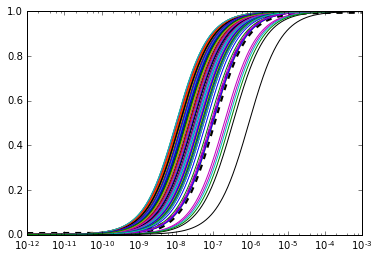

In [6]:
## Plot initial population of curves.

plt.plot()

plt.plot(pop1.start_model.xvals, pop1.target,"k--",lw=5)

for i in pop1.population:
    plt.plot(i.xvals,i.output)
    
plt.xscale("log")

In [7]:
# Select for 500 generations
# Store mean fitness, fitness variance, and parameter variances

w1 = []
w1_var = []
k1_var1 = []
k1_mean1 = []
for i in range(500):
    pop1.select()
    w1.append(pop1.mean_fitness)
    w1_var.append(pop1.fitness_var)
    k1_var1.append(pop1.param_vars["k1"])
    k1_mean1.append(pop1.param_means["k1"])

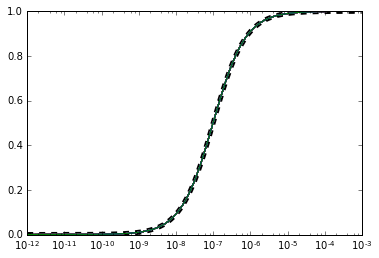

In [8]:
# Plot population after selection

plt.plot(pop1.start_model.xvals, pop1.target,"k--",lw=5)

for i in pop1.population:
    plt.plot(i.xvals, i.output)

plt.xscale("log")

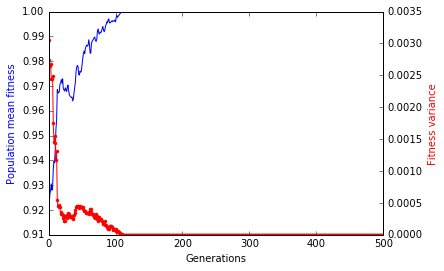

In [9]:
# Plot fitness mean and variance over generations

fig,ax1 = plt.subplots()
ax1.plot(w1,"b")
ax1.set_ylabel("Population mean fitness",color="blue")
ax1.set_xlabel("Generations")

ax2 = ax1.twinx()
ax2.plot(w1_var,"r.-")
ax2.set_ylabel("Fitness variance",color="red")

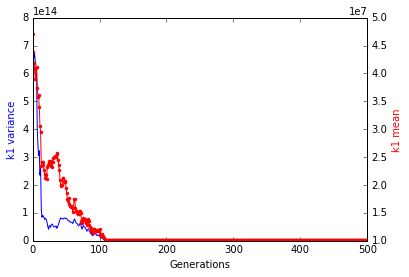

In [10]:
# Plot parameter variances: k1,k2,f

fig,ax1 = plt.subplots()
ax1.plot(k1_var1,"b")
ax1.set_ylabel("k1 variance",color="blue")
ax1.set_xlabel("Generations")

ax2 = ax1.twinx()
ax2.plot(k1_mean1,"r.-")
ax2.set_ylabel("k1 mean",color="red")


## New population - 100 rounds of mutation/selection in a 1-site model

In [45]:
pop2 = pop.PhysPopulation(startModel=ssb1,mutModel=mutator,N=100)

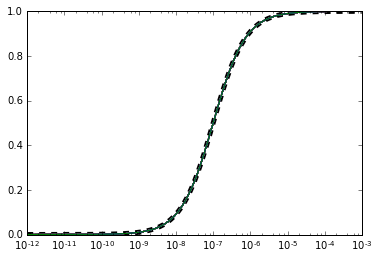

In [46]:
plt.plot()

plt.plot(pop2.start_model.xvals, pop2.target,"k--",lw=5)

for i in pop2.population:
    plt.plot(i.xvals, i.output)

plt.xscale("log")

In [47]:
# Select/mutate for 200 generations

w2 = []
w2_var = []
k1_var2 = []
k1_mean2 = []
for i in range(200):
    pop2.procreate()
    pop2.select()
    w2.append(pop2.mean_fitness)
    w2_var.append(pop2.fitness_var)
    k1_var2.append(pop2.param_vars["k1"])
    k1_mean2.append(pop2.param_means["k1"])
    

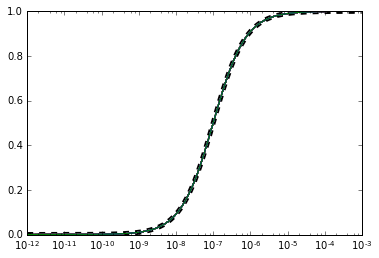

In [48]:
# Plot
plt.plot()

plt.plot(pop2.start_model.xvals, pop2.target,"k--",lw=5)

for i in pop2.population:
    plt.plot(i.xvals, i.output)
    
plt.xscale("log")

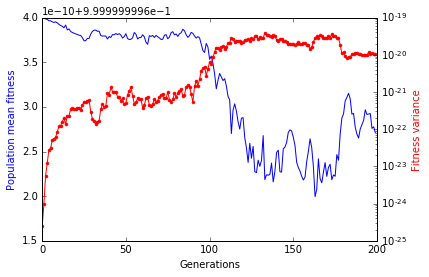

In [49]:
fig,ax1 = plt.subplots()
ax1.plot(w2,"b")
ax1.set_ylabel("Population mean fitness",color="blue")
ax1.set_xlabel("Generations")

ax2 = ax1.twinx()
ax2.plot(w2_var,"r.-")
ax2.set_ylabel("Fitness variance",color="red")

plt.yscale("log")

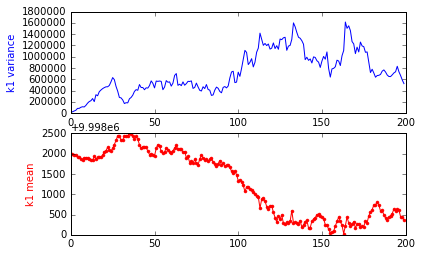

In [50]:
fig,(ax1,ax2) = plt.subplots(2)
ax1.plot(k1_var2,"b")
ax1.set_ylabel("k1 variance",color="blue")
ax1.set_xlabel("Generations")

ax2.plot(k1_mean2,"r.-")
ax2.set_ylabel("k1 mean",color="red")


### 2-site

In [37]:
mutator = mut.SSBmut(mutations=mutFuncs,nk_prob=nk_mut_prob,anyF_prob=f_mut_prob)
pop3 = pop.PhysPopulation(startModel=ssb2,mutModel=mutator,N=100)

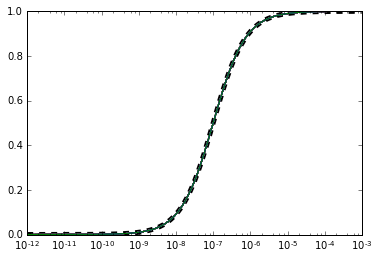

In [38]:
plt.plot()

plt.plot(pop3.start_model.xvals, pop3.target,"k--",lw=5)

for i in pop3.population:
    plt.plot(i.xvals, i.output)

plt.xscale("log")

In [39]:
# Select/mutate for 200 generations

w3 = []
w3_var = []
k1_var3 = []
k2_var3 = []
f_var3 = []
k1_mean3 = []
k2_mean3 = []
f_mean3 = []
for i in range(200):
    pop3.procreate()
    pop3.select()
    w3.append(pop3.mean_fitness)
    w3_var.append(pop3.fitness_var)
    k1_var3.append(pop3.param_vars["k1"])
    k2_var3.append(pop3.param_vars["k2"])
    f_var3.append(pop3.param_vars["f12"])
    k1_mean3.append(pop3.param_means["k1"])
    k2_mean3.append(pop3.param_means["k2"])
    f_mean3.append(pop3.param_means["f12"])

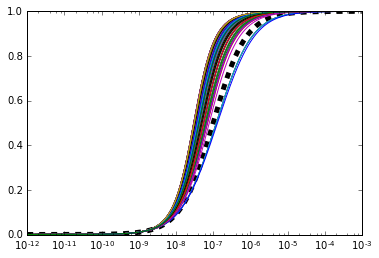

In [40]:
plt.plot()

plt.plot(pop3.start_model.xvals, pop3.target,"k--",lw=5)

for i in pop3.population:
    plt.plot(i.xvals, i.output)

plt.xscale("log")

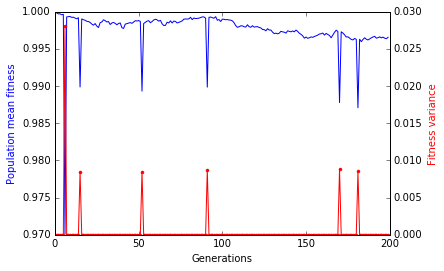

In [41]:
fig,ax1 = plt.subplots()
ax1.plot(w3,"b")
ax1.set_ylabel("Population mean fitness",color="blue")
ax1.set_xlabel("Generations")

ax2 = ax1.twinx()
ax2.plot(w3_var,"r.-")
ax2.set_ylabel("Fitness variance",color="red")

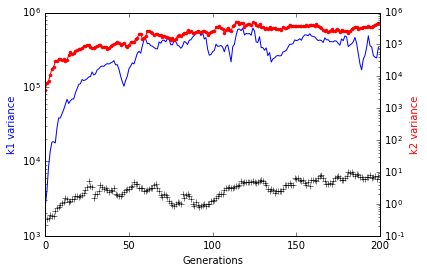

In [42]:
fig,ax1 = plt.subplots()
ax1.plot(k1_var3,"b")
ax1.set_ylabel("k1 variance",color="blue")
ax1.set_xlabel("Generations")
plt.yscale("log")

ax2 = ax1.twinx()
ax2.plot(k2_var3,"r.-")
ax2.set_ylabel("k2 variance",color="red")

ax2.plot(f_var3,"k+")

plt.yscale("log")

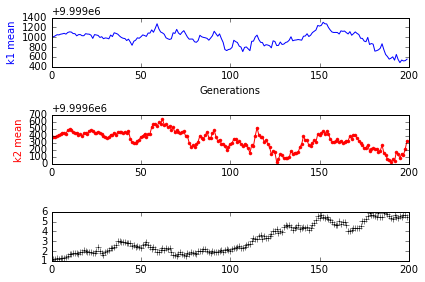

In [43]:
fig,(ax1,ax2,ax3) = plt.subplots(3)

ax1.plot(k1_mean3,"b")
ax1.set_ylabel("k1 mean",color="blue")
ax1.set_xlabel("Generations")

ax2.plot(k2_mean3,"r.-")
ax2.set_ylabel("k2 mean",color="red")

ax3.plot(f_mean3,"k+")

plt.tight_layout()

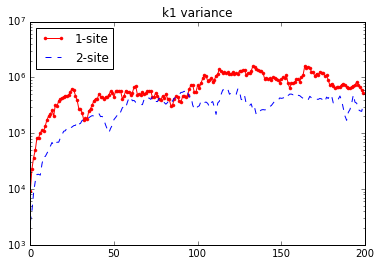

In [51]:
fig,ax1 = plt.subplots()

ax1.plot(k1_var2,"r.-",label="1-site")

ax1.plot(k1_var3,"b--",label="2-site")

plt.yscale("log")
plt.legend(loc=0)

plt.title("k1 variance")

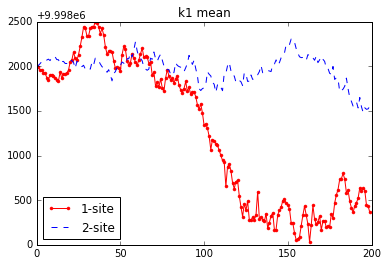

In [53]:
fig,ax1 = plt.subplots()

ax1.plot(k1_mean2,"r.-",label="1-site")

ax1.plot(k1_mean3,"b--",label="2-site")

#plt.yscale("log")
plt.legend(loc=0)

plt.title("k1 mean")

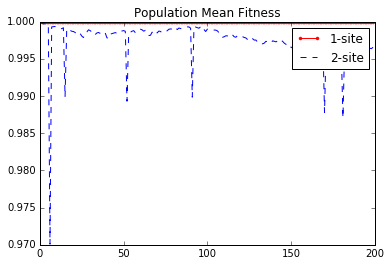

In [54]:
fig,ax1 = plt.subplots()

ax1.plot(w2,"r.-",label="1-site")
#ax1.set_ylabel("1-site k1 mean",color="blue")

ax1.plot(w3,"b--",label="2-site")
plt.legend()
plt.title("Population Mean Fitness")

### Mutation function with tandem duplications

In [56]:
# Define mutation functions
# Keep nk the same for now
mutFuncs2 = {"k": lambda x: x + random.normalvariate(0,100),
            "f": lambda x: x + random.normalvariate(0,.1),
            "nk": lambda x: x*2 if x < 8 else x}

# Probability of nk and any f mutating. The probability of any k mutating is 1-nk-f
nk_mut_prob2 = .1
f_mut_prob2 = .3

mutator2 = mut.SSBmut(mutations=mutFuncs2,nk_prob=nk_mut_prob2,anyF_prob=f_mut_prob2)

In [57]:
## Start with one site

pop4 = pop.PhysPopulation(startModel=ssb1,mutModel=mutator2,N=100)

In [58]:
param_means4 = {}
param_vars4 = {}
w4 = []

for i in range(100):
    pop4.procreate()
    pop4.select()
    for p,val in pop4.param_means.iteritems():
        if p not in param_means4:
            param_means4[p] = {i:val}
        else:
            param_means4[p][i] = val
    for p,val in pop4.param_vars.iteritems():
        if p not in param_vars4:
            param_vars4[p] = {i:val}
        else:
            param_vars4[p][i] = val
    w4.append(pop4.mean_fitness)

In [59]:
means4 = pd.DataFrame(param_means4)
vars4 = pd.DataFrame(param_vars4)

In [60]:
vars4.head()

,f12,f123,f1234,f12345,f123456,f1234567,f12345678,f1234568,f123457,f1234578,...,f78,k1,k2,k3,k4,k5,k6,k7,k8,nk
0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8707.794359,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.1056
1,0.001674,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,13456.628476,3230.460541,0.000000,0.000000,NaN,NaN,NaN,NaN,0.2011
2,0.001502,0.0,0.005172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28675.051669,10871.098445,0.000000,0.000000,NaN,NaN,NaN,NaN,0.5331
3,0.002827,0.0,0.004489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,35433.286027,16426.261925,345.920334,345.920334,0.0,0.0,0.0,0.0,1.3275
4,0.005168,0.0,0.007183,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,42574.471385,28388.938680,345.920334,3108.708971,0.0,0.0,0.0,0.0,0.7836


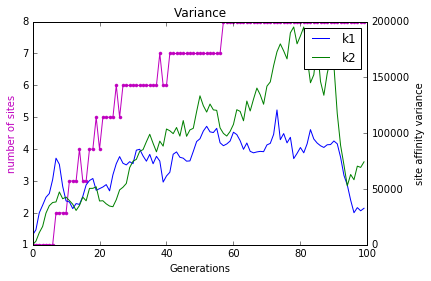

In [61]:
fig,ax1 = plt.subplots()
ax1.plot(means4["nk"],'m.-',label="nk")
ax1.set_ylabel("number of sites",color="m")
ax2 = ax1.twinx()
plt.plot(vars4["k1"],label="k1")
plt.plot(vars4["k2"],label="k2")
ax2.set_ylabel("site affinity variance")
ax1.set_xlabel("Generations")
plt.legend()
plt.title("Variance")

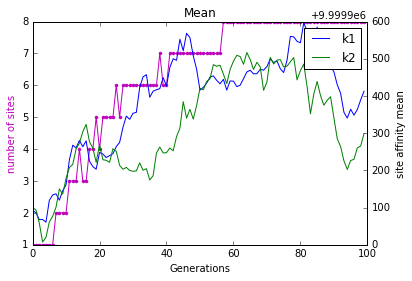

In [62]:
fig,ax1 = plt.subplots()
ax1.plot(means4["nk"],'m.-',label="nk")
ax1.set_ylabel("number of sites",color='m')
ax2 = ax1.twinx()
plt.plot(means4["k1"],label="k1")
plt.plot(means4["k2"],label="k2")
ax2.set_ylabel("site affinity mean")
ax1.set_xlabel("Generations")
plt.legend()
plt.title("Mean")

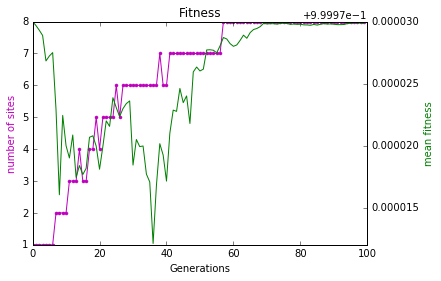

In [63]:
fig,ax1 = plt.subplots()
ax1.plot(means4["nk"],'m.-',label="nk")
ax1.set_ylabel("number of sites",color='m')
ax2 = ax1.twinx()
ax2.set_ylabel("mean fitness",color='g')
ax1.set_xlabel("Generations")
plt.plot(w4,'g',label="w")
plt.title("Fitness")